<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1> Geometric Operations and Other Mathematical Tools</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image.


<ul>
    <li><a href='https://https://#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling  </li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations n</li> 
          </ul>

</ul>


***


Download the image for the lab:


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

We will import the following:


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [2]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# Geometric Transformations


Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.


## Scaling


We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


Consider the following image with the corresponding intensity values:


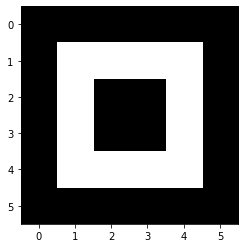

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [3]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

We can rescale along a specific axis:

*   `fx`: scale factor along the horizontal axis
*   `fy`: scale factor along the vertical axis


The parameter interpolation estimates pixel values based on neighboring pixels. <code>INTER_NEAREST</code> uses the nearest pixel and <code>INTER_CUBIC</code> uses several pixels near the pixel value we would like to estimate.


In [ ]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )
plt.imshow(new_toy,cmap='gray')
plt.show()


Consider the following image:


In [ ]:
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

We can scale the horizontal axis by two and leave the vertical axis as is:


In [ ]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

In the same manner, we can scale the vertical axis by two:


In [ ]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can scale the horizontal axis and vertical axis by two.


In [ ]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can also shrink the image by setting the scaling factor to a real number between 0 and 1:


In [ ]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can  also specify the number of rows and columns:


In [ ]:
rows = 100
cols = 200

In [ ]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

## Translation


Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image.

In this example, we shift the image 100 pixels horizontally:


In [ ]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

The shape of the image is given by:


In [ ]:
rows, cols, _ = image.shape

We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:


In [40]:
new_image = cv2.warpAffine(image, M, (cols, rows))

We can plot the image; the portions of the image that do not have any intensities are set to zero:


In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can see some of the original image has been cut off. We can fix this by changing the output image size: <code>(cols + tx,rows + ty)</code>:


In [ ]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can shift the image horizontally:


In [ ]:
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

## Rotation


We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


We can rotate our toy image by 45 degrees:


In [ ]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

In [ ]:
plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")

Looking at intensity values, we see that many values have been interpolated:


In [ ]:
new_toy_image 

We can perform the same operation on color images:


In [ ]:
cols, rows, _ = image.shape

In [ ]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

# Mathematical Operations


## Array Operations


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.


In [ ]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can also multiply every pixel's intensity value by a constant value.


In [ ]:
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [ ]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
Noise.shape


We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


In [ ]:
new_image = image + Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

At the same time, we can multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result.


In [ ]:
new_image = image*Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Matrix Operations


Grayscale images are matrices. Consider the following grayscale image:


In [ ]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [ ]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

We see <code>s</code> is not rectangular:


In [ ]:
s.shape

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [ ]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)


We can plot the matrix `U` and `V`:


In [ ]:
 plot_image(U,V,title_1="Matrix U ",title_2="matrix  V")

We see most of the elements in `S` are zero:


In [ ]:
plt.imshow(S,cmap='gray')
plt.show()

We can find the matrix product of all the matrices. First, we can perform matrix multiplication on `S` and `U` and assign it  to `B` and plot the results:


In [ ]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

We can find the matrix product of `U`, `S`, and `B`. We see it’s the entire image:


In [ ]:
A = U.dot(B)

In [ ]:
plt.imshow(A,cmap='gray')
plt.show()

It turns out many elements are redundant, so we can eliminate some rows and columns of `S` and `V` and approximate the image by finding the product.


In [ ]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()

We see we only need 100 to 200 Components to represent the image.


<h2>Authors</h2>


[Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


# References


\[1]  Images were taken from: [https://homepages.cae.wisc.edu/\~ece533/images/](https://homepages.cae.wisc.edu/\~ece533/images/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01)

\[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>Pillow Docs</a>

\[3]  <a href='https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>Open CV</a>

\[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

\[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<h2>Change Log</h2>


<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>


Copyright © 2020 IBM Corporation. All rights reserved.
